In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = "MIDMARKS.xlsx"
df = pd.read_excel(file_path)


In [4]:
print(df.head())       # First 5 rows
# print(df.info())       # Column data types and null counts
# print(df.describe())   # Summary statistics


   S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0   1.0   ALPHA  12    0  17    9  19   15
1   2.0   ALPHA  19   12  16   16  18    3
2   3.0   ALPHA  18   14  18   18  18   16
3   4.0   ALPHA  15    9  19   17  19   15
4   5.0   ALPHA  18   17  19   19  20   18


In [6]:
df = df.fillna(0)  # Replace NaN with 0 (or other appropriate method)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18
714,0.0,ZETA,12,1,7,10,20,8
715,0.0,ZETA,17,6,14,14,17,18
716,0.0,ZETA,12,1,6,7,15,12


In [9]:
def assign_grade(total):
    if total >= 90:
        return 'A+'
    elif total >= 75:
        return 'A'
    elif total >= 60:
        return 'B'
    elif total >= 50:
        return 'C'
    else:
        return 'F'

df['Grade'] = df['Total'].apply(assign_grade)
df


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
0,1.0,ALPHA,12,0,17,9,19,15,0.0,F
1,2.0,ALPHA,19,12,16,16,18,3,0.0,F
2,3.0,ALPHA,18,14,18,18,18,16,0.0,F
3,4.0,ALPHA,15,9,19,17,19,15,0.0,F
4,5.0,ALPHA,18,17,19,19,20,18,0.0,F
...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18,0.0,F
714,0.0,ZETA,12,1,7,10,20,8,0.0,F
715,0.0,ZETA,17,6,14,14,17,18,0.0,F
716,0.0,ZETA,12,1,6,7,15,12,0.0,F


In [11]:
df['Rank'] = df['Total'].rank(ascending=False, method='dense').astype(int)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade,Rank
0,1.0,ALPHA,12,0,17,9,19,15,0.0,F,1
1,2.0,ALPHA,19,12,16,16,18,3,0.0,F,1
2,3.0,ALPHA,18,14,18,18,18,16,0.0,F,1
3,4.0,ALPHA,15,9,19,17,19,15,0.0,F,1
4,5.0,ALPHA,18,17,19,19,20,18,0.0,F,1
...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18,0.0,F,1
714,0.0,ZETA,12,1,7,10,20,8,0.0,F,1
715,0.0,ZETA,17,6,14,14,17,18,0.0,F,1
716,0.0,ZETA,12,1,6,7,15,12,0.0,F,1


Column Names: Index(['S.NO', 'SECTION', 'DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS'], dtype='object')


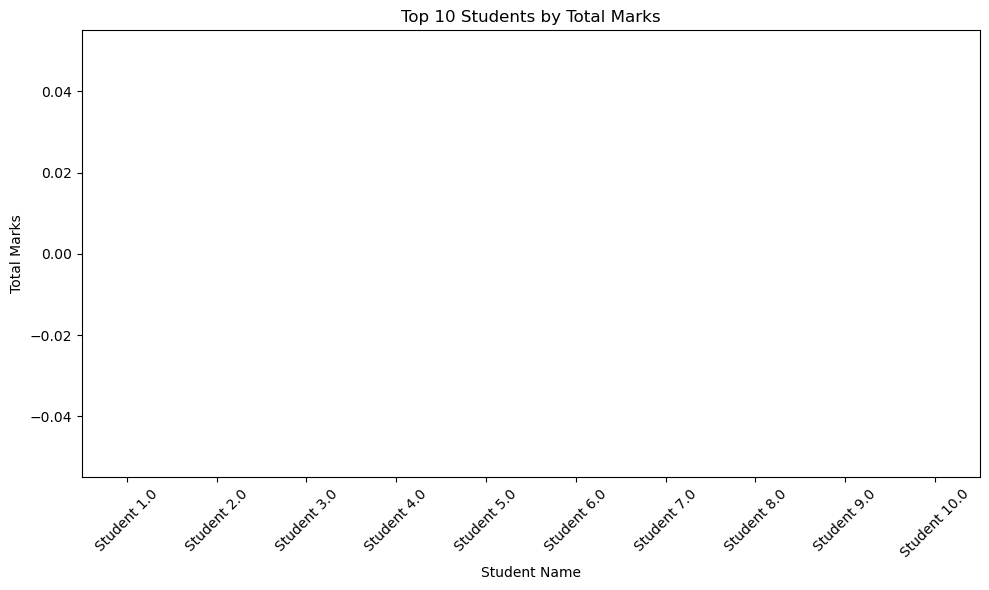

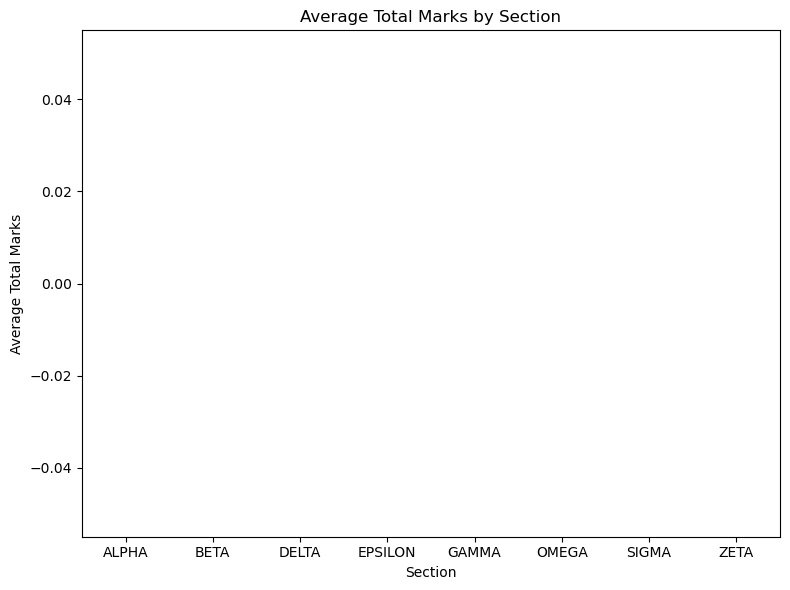

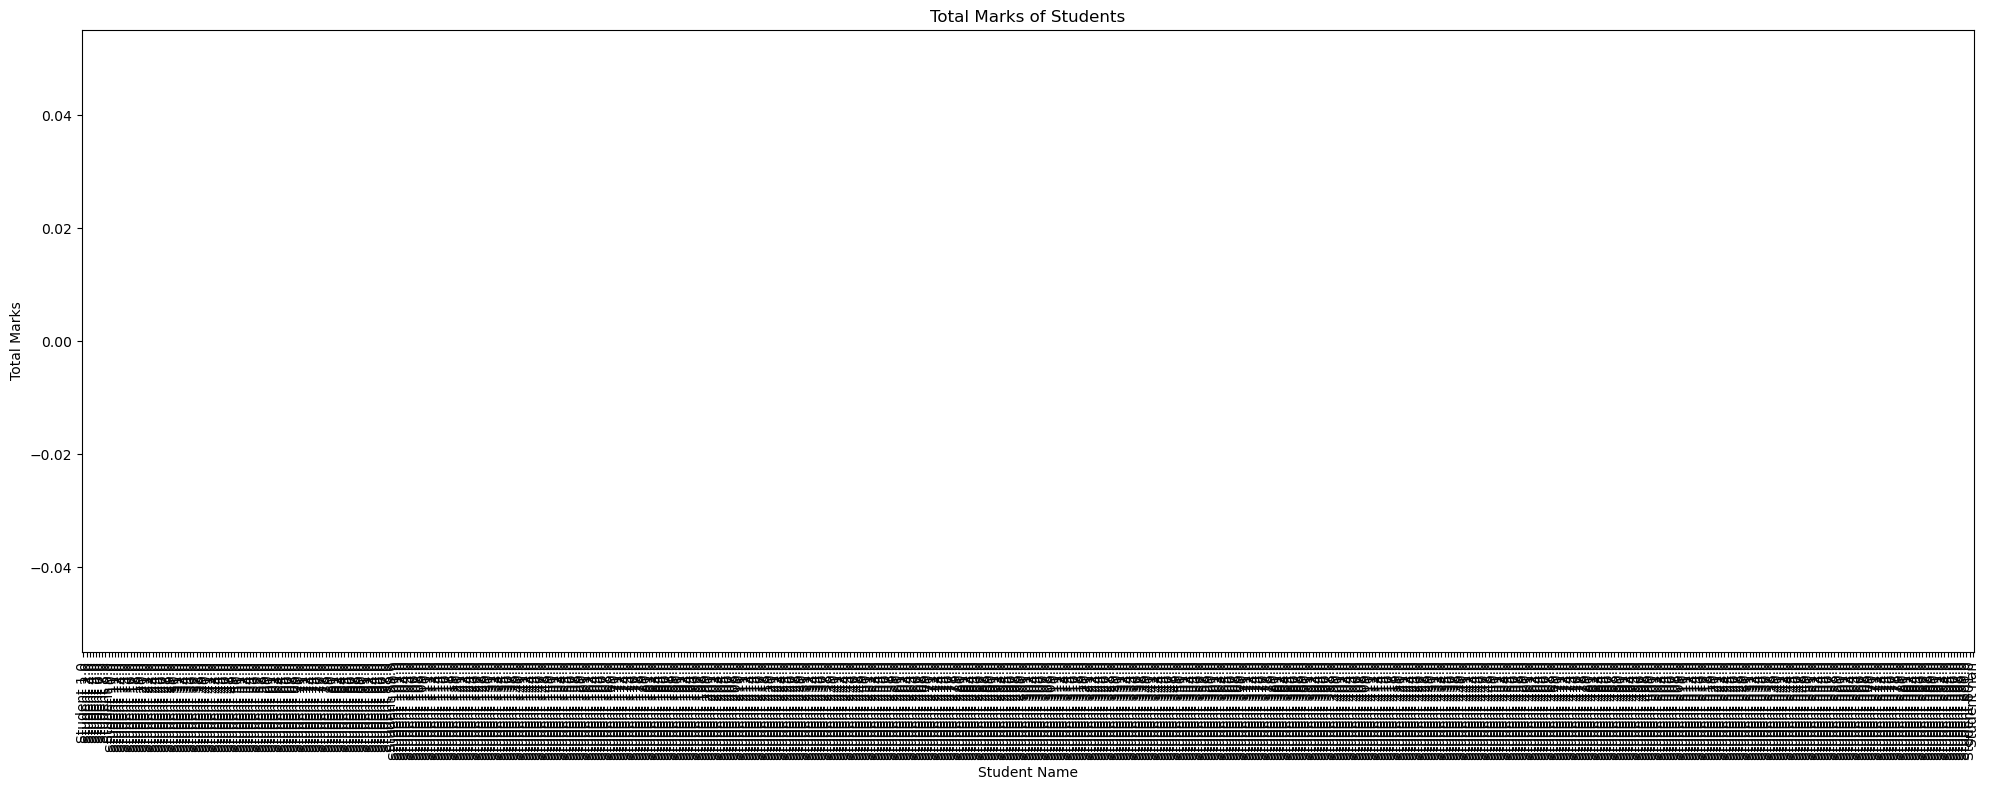

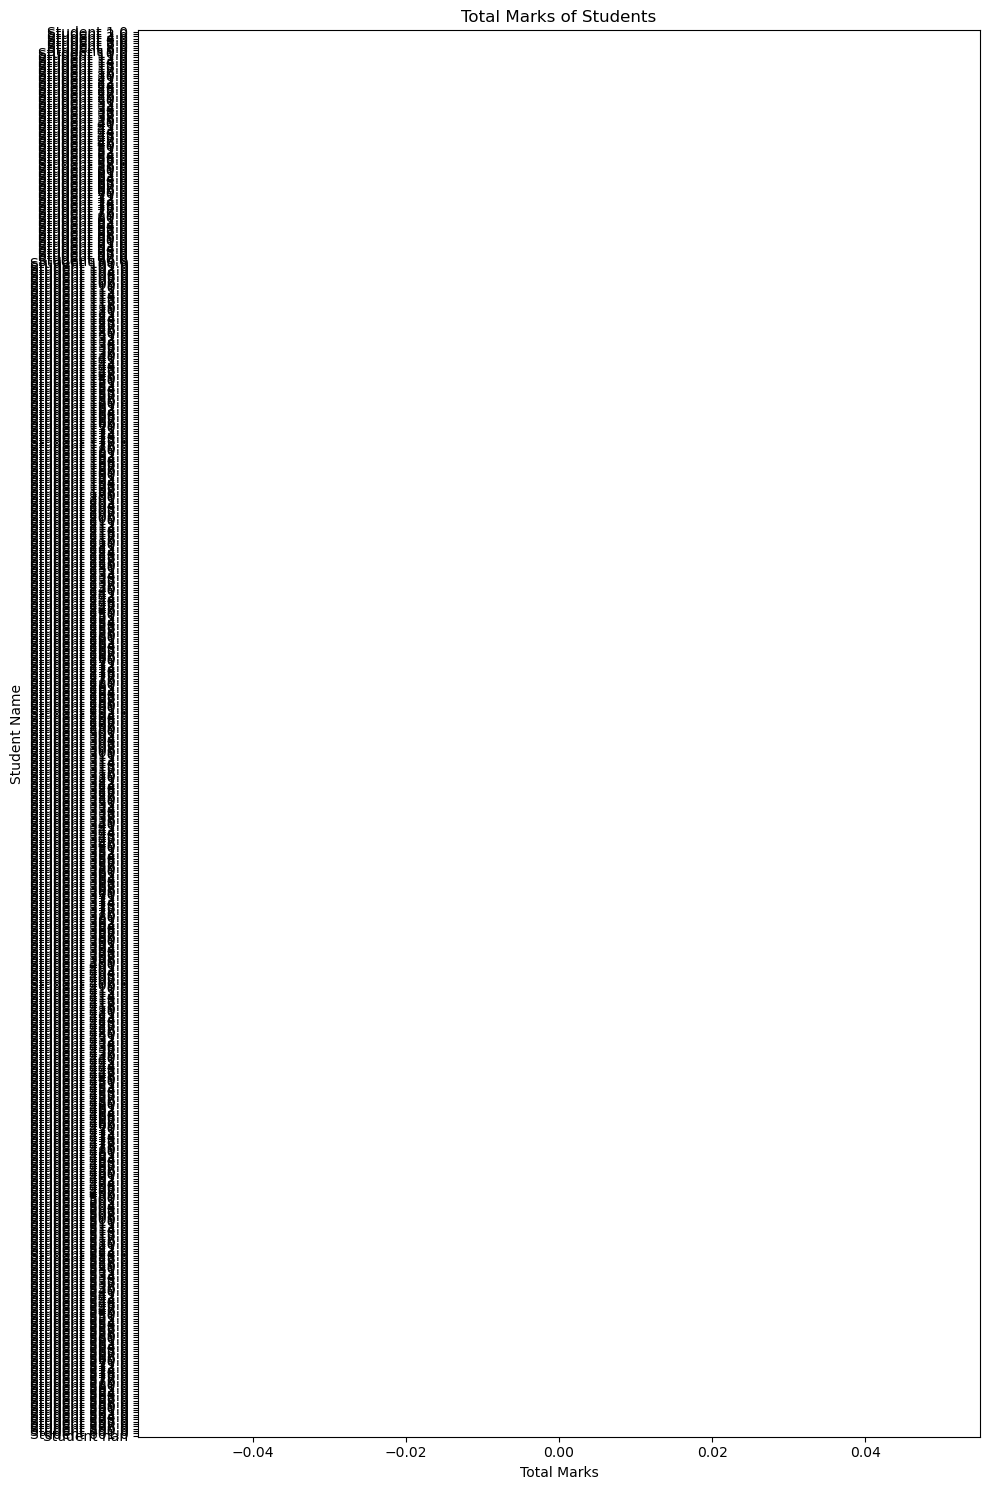

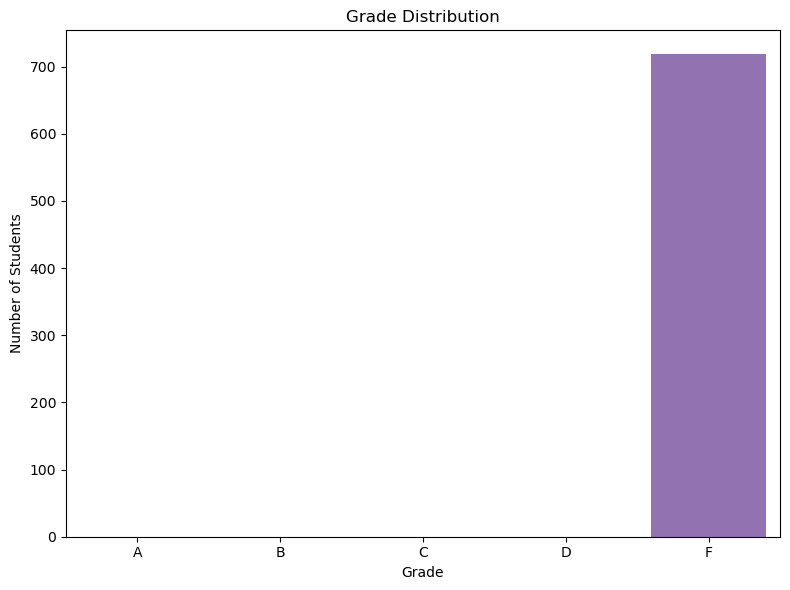

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'MIDMARKS.xlsx'  # Update this path if needed
df = pd.read_excel(file_path)

# Check the column names
print("Column Names:", df.columns)

# Step 1: Create a 'Total' column
# Select only numeric columns to calculate the total
numeric_columns = df.iloc[:, 2:].select_dtypes(include='number')
df['Total'] = numeric_columns.sum(axis=1)

# Step 2: Create a 'Student Name' column (optional)
# If no student names are available, use S.NO as identifiers
df['Student Name'] = 'Student ' + df['S.NO'].astype(str)

# Step 3: Add a 'Grade' column based on total marks
def assign_grade(total):
    if total >= 90:
        return 'A'
    elif total >= 75:
        return 'B'
    elif total >= 60:
        return 'C'
    elif total >= 50:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Total'].apply(assign_grade)

# Option 1: Plot the top 10 students by total marks
top_students = df.nlargest(10, 'Total')  # Select top 10 rows based on 'Total'
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Name', y='Total', data=top_students)
plt.xticks(rotation=45)
plt.title('Top 10 Students by Total Marks')
plt.xlabel('Student Name')
plt.ylabel('Total Marks')
plt.tight_layout()
plt.show()

# Option 2: Plot average total marks by section
section_avg = df.groupby('SECTION')['Total'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='SECTION', y='Total', data=section_avg)
plt.title('Average Total Marks by Section')
plt.xlabel('Section')
plt.ylabel('Average Total Marks')
plt.tight_layout()
plt.show()

# Option 3: Plot total marks for all students with increased figure size
plt.figure(figsize=(20, 8))
sns.barplot(x='Student Name', y='Total', data=df)
plt.xticks(rotation=90)  # Rotate labels vertically
plt.title('Total Marks of Students')
plt.xlabel('Student Name')
plt.ylabel('Total Marks')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Option 4: Horizontal bar chart for better readability
plt.figure(figsize=(10, 15))
sns.barplot(y='Student Name', x='Total', data=df)
plt.title('Total Marks of Students')
plt.ylabel('Student Name')
plt.xlabel('Total Marks')
plt.tight_layout()
plt.show()

# Option 5: Count plot for grade distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Grade', data=df, order=['A', 'B', 'C', 'D', 'F'])
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


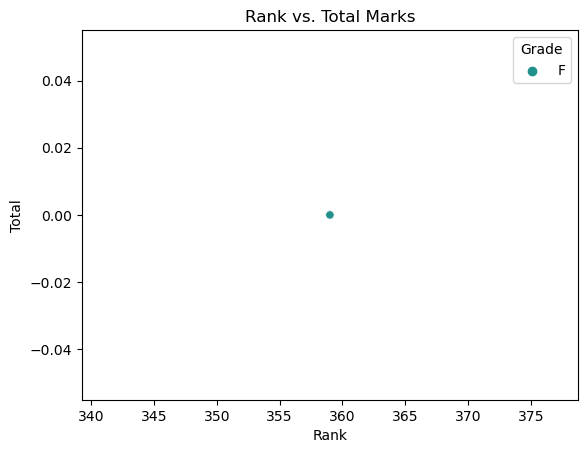

In [29]:
# Adding Rank column based on Total marks (higher marks get a better rank)
df['Rank'] = df['Total'].rank(ascending=False).astype(int)

# Scatterplot with Rank and Total
sns.scatterplot(x='Rank', y='Total', data=df, hue='Grade', palette='viridis')
plt.title('Rank vs. Total Marks')
plt.show()


In [30]:
sns.set_theme(style='whitegrid')  # Use a predefined Seaborn theme
plt.savefig('visualization.png') # Save the plot as an image


<Figure size 640x480 with 0 Axes>

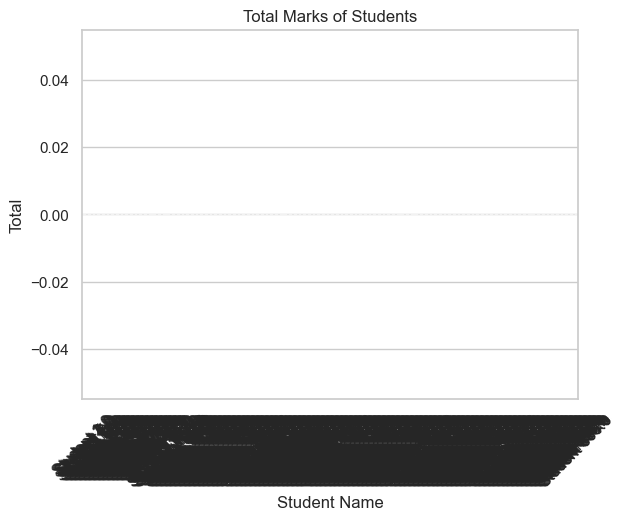

In [31]:
sns.barplot(x='Student Name', y='Total', data=df)
plt.xticks(rotation=45)
plt.title('Total Marks of Students')
plt.show()


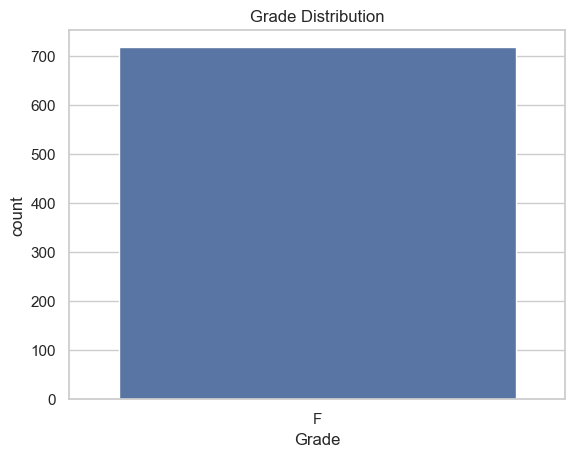

In [32]:
sns.countplot(x='Grade', data=df)
plt.title('Grade Distribution')
plt.show()


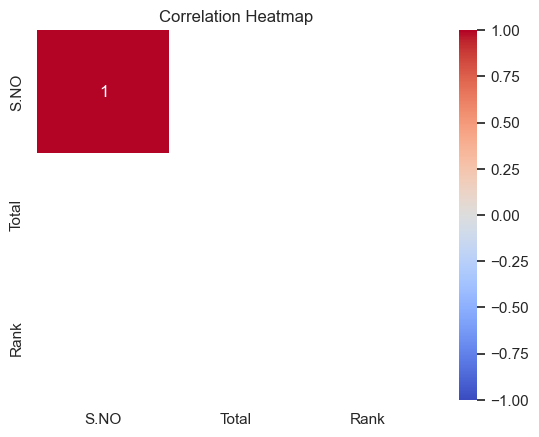

In [34]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


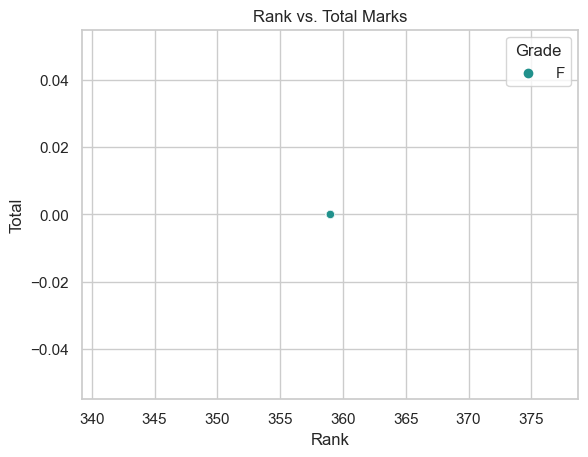

In [35]:
sns.scatterplot(x='Rank', y='Total', data=df, hue='Grade', palette='viridis')
plt.title('Rank vs. Total Marks')
plt.show()


In [39]:
sns.set_theme(style='whitegrid')  # Use a white grid theme for all plots
plt.savefig('visualization.png')  # Replace 'visualization.png' with the desired filename


<Figure size 640x480 with 0 Axes>

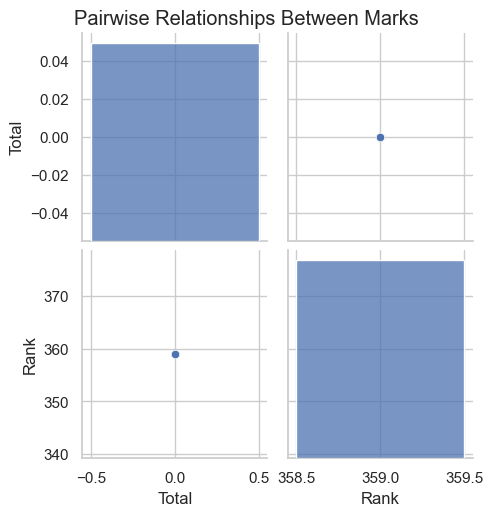

In [40]:
sns.pairplot(df.iloc[:, 1:])  # Exclude non-numeric columns like names
plt.suptitle('Pairwise Relationships Between Marks', y=1.02)
plt.show()


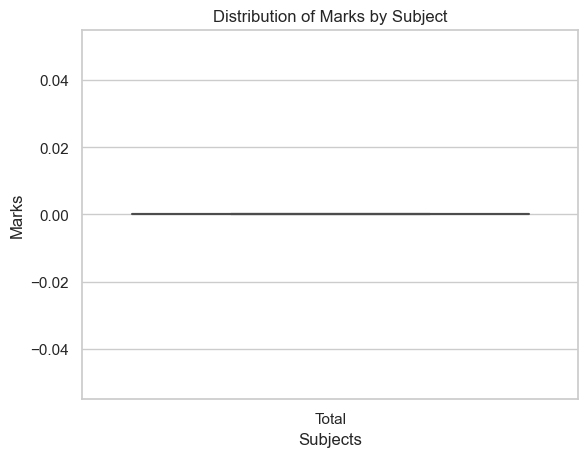

In [41]:
sns.boxplot(data=df.iloc[:, 1:-3])  # Exclude non-numeric and derived columns
plt.title('Distribution of Marks by Subject')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.show()


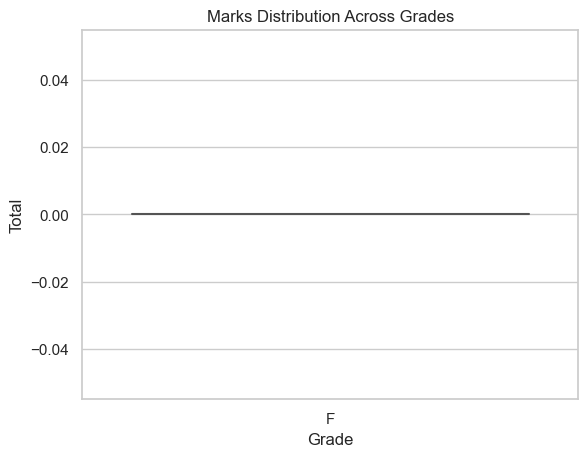

In [42]:
sns.violinplot(x='Grade', y='Total', data=df, palette='muted')
plt.title('Marks Distribution Across Grades')
plt.show()


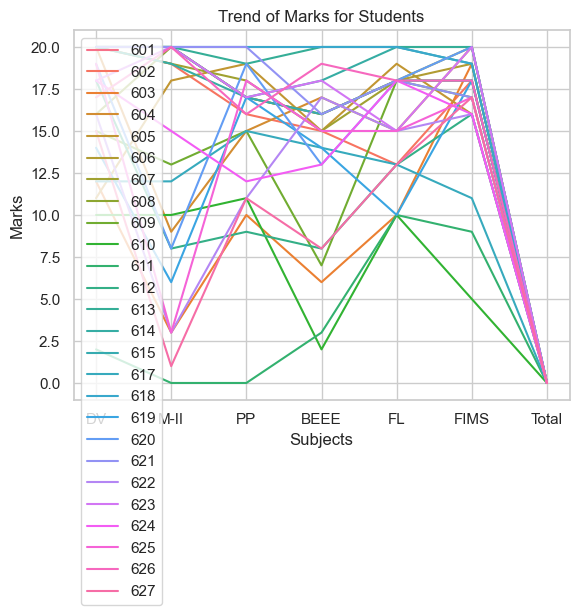

In [43]:
sns.lineplot(data=df.iloc[:, 1:-3].T, dashes=False)
plt.title('Trend of Marks for Students')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.show()


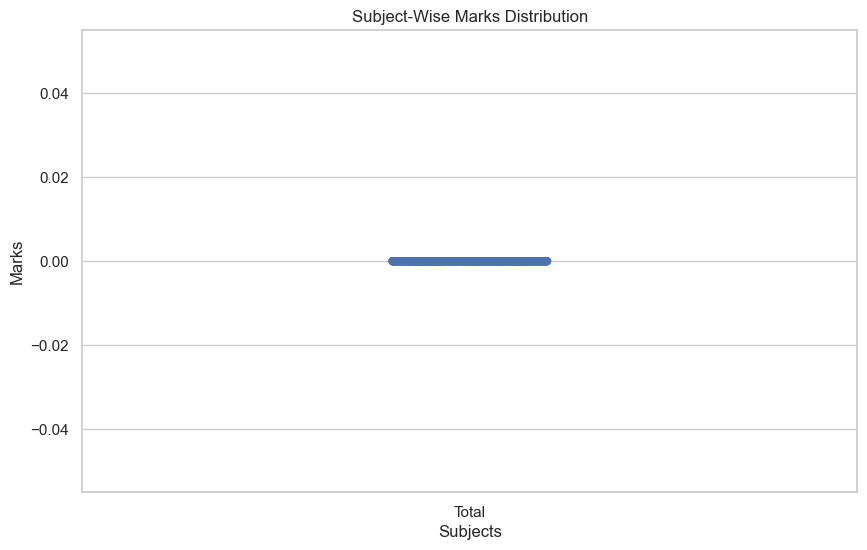

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use stripplot to avoid overlapping points
plt.figure(figsize=(10, 6))
sns.stripplot(data=df.iloc[:, 1:-3], size=6, jitter=True)
plt.title('Subject-Wise Marks Distribution')
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.show()


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for unique values in the 'Total' column
print(df['Total'].unique())

# If the 'Total' column has varying values, plot the density
if df['Total'].nunique() > 1:  # Ensure there's more than one unique value
    sns.kdeplot(df['Total'], shade=True, color='blue')
    plt.title('Density of Total Marks')
    plt.xlabel('Total Marks')
    plt.ylabel('Density')
    plt.show()
else:
    print("The 'Total' column has constant values, density plot can't be generated.")


[0.]
The 'Total' column has constant values, density plot can't be generated.


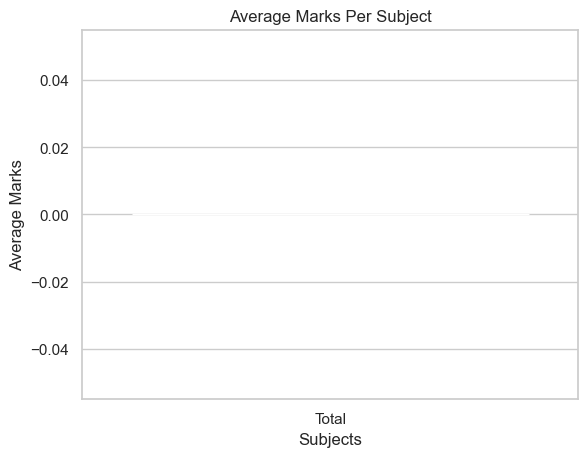

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns and calculate the mean
numeric_columns = df.iloc[:, 1:-3].select_dtypes(include='number')
subject_means = numeric_columns.mean()

# Plot the barplot
sns.barplot(x=subject_means.index, y=subject_means.values, palette='pastel')
plt.title('Average Marks Per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.show()


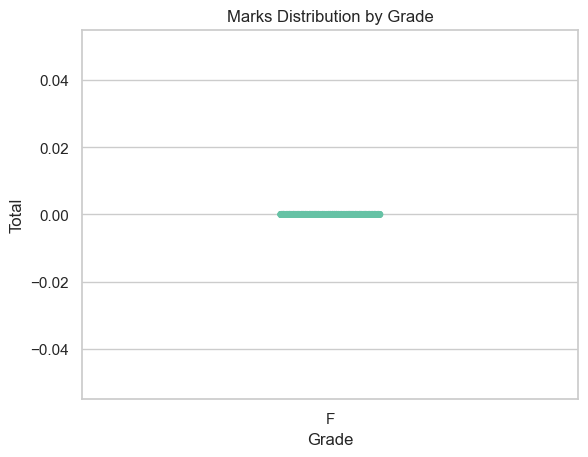

In [51]:
sns.stripplot(x='Grade', y='Total', data=df, jitter=True, palette='Set2')
plt.title('Marks Distribution by Grade')
plt.show()


In [52]:
df['Absentees'] = df.iloc[:, 1:-3].apply(lambda row: (row == 0).sum(), axis=1)
absent_students = df[df['Absentees'] > 0]
print(absent_students)


     S.NO SECTION  DV M-II  PP BEEE  FL FIMS  Total Student Name Grade  Rank  \
0     1.0   ALPHA  12    0  17    9  19   15    0.0  Student 1.0     F   359   
1     2.0   ALPHA  19   12  16   16  18    3    0.0  Student 2.0     F   359   
2     3.0   ALPHA  18   14  18   18  18   16    0.0  Student 3.0     F   359   
3     4.0   ALPHA  15    9  19   17  19   15    0.0  Student 4.0     F   359   
4     5.0   ALPHA  18   17  19   19  20   18    0.0  Student 5.0     F   359   
..    ...     ...  ..  ...  ..  ...  ..  ...    ...          ...   ...   ...   
713   NaN    ZETA  19    8   8   19  17   18    0.0  Student nan     F   359   
714   NaN    ZETA  12    1   7   10  20    8    0.0  Student nan     F   359   
715   NaN    ZETA  17    6  14   14  17   18    0.0  Student nan     F   359   
716   NaN    ZETA  12    1   6    7  15   12    0.0  Student nan     F   359   
717   NaN    ZETA  19   14  17   16  20   19    0.0  Student nan     F   359   

     Absentees  
0            2  
1    

In [54]:
# Filter for numeric columns
numeric_columns = df.iloc[:, 1:-3].select_dtypes(include='number')

# Calculate the minimum marks
min_marks = numeric_columns.min()
print(min_marks)


Total    0.0
dtype: float64


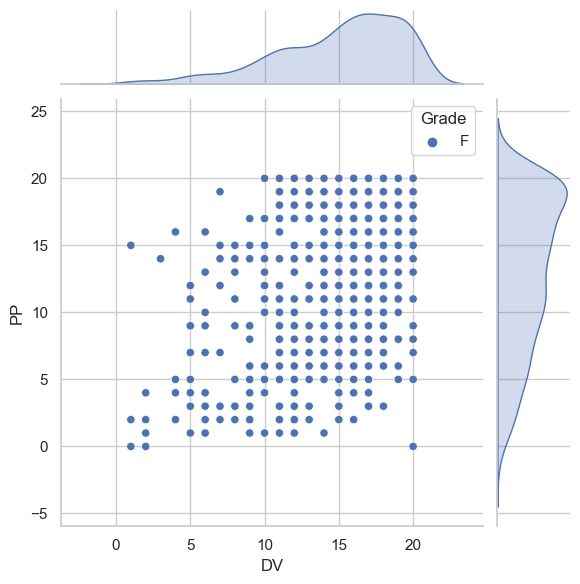

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean column names
df.columns = df.columns.str.strip()

# Check and convert data types
df['DV'] = pd.to_numeric(df['DV'], errors='coerce')
df['PP'] = pd.to_numeric(df['PP'], errors='coerce')

# Plot
sns.jointplot(data=df, x="DV", y="PP", kind="scatter", hue="Grade")
plt.show()


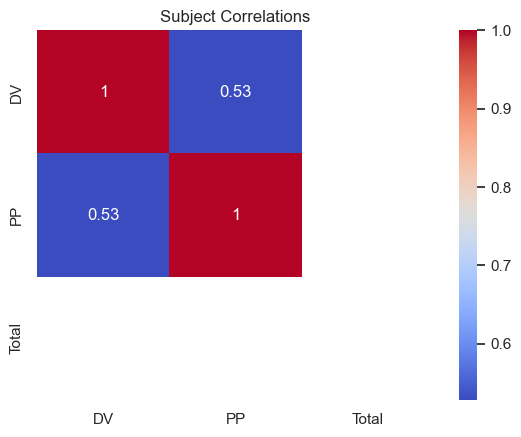

In [63]:
correlation_matrix = df.iloc[:, 1:-3].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Subject Correlations")
plt.show()


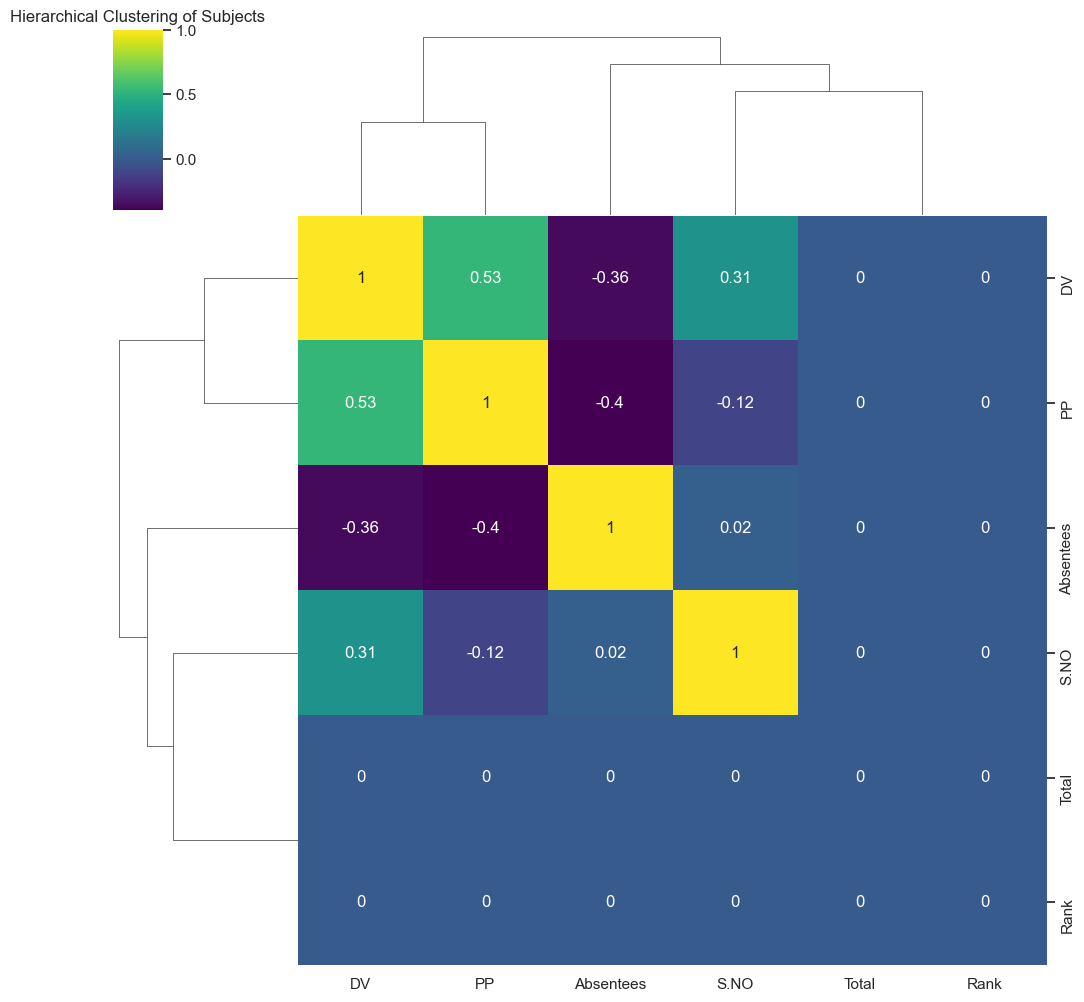

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the correlation matrix is clean
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan)
correlation_matrix = correlation_matrix.fillna(0)

# Plot the clustermap
sns.clustermap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Hierarchical Clustering of Subjects")  # plt.title does not apply to sns.clustermap directly.
plt.show()


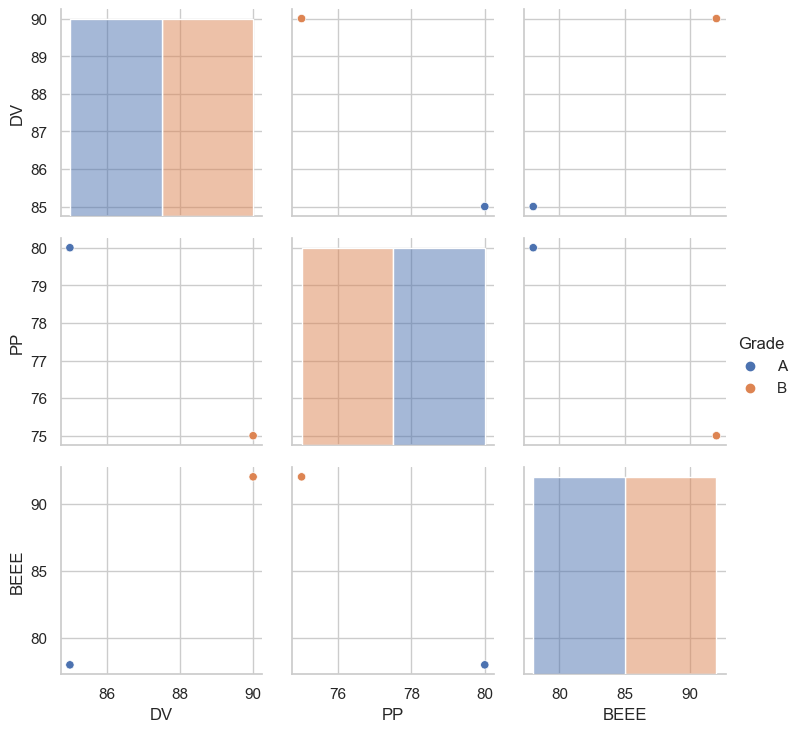

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
data = {
    "DV": [85, 90, "A", 70, 65],
    "PP": [80, 75, 88, "A", 60],
    "BEEE": [78, 92, 84, 71, "A"],
    "Grade": ["A", "B", "A", "C", "B"]
}
df = pd.DataFrame(data)

# Step 1: Convert columns to numeric, replacing non-numeric values with NaN
numeric_columns = ["DV", "PP", "BEEE"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Handle missing values (NaN)
# Option 1: Drop rows with NaN values
df.dropna(subset=numeric_columns, inplace=True)

# Option 2: Alternatively, you can fill NaN with a specific value (e.g., 0 or column mean)
# for col in numeric_columns:
#     df[col].fillna(df[col].mean(), inplace=True)

# Step 3: Plot the PairGrid
g = sns.PairGrid(df, vars=numeric_columns, hue="Grade")
g.map_diag(sns.histplot, kde=True)  # KDE for smoother distribution on the diagonal
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


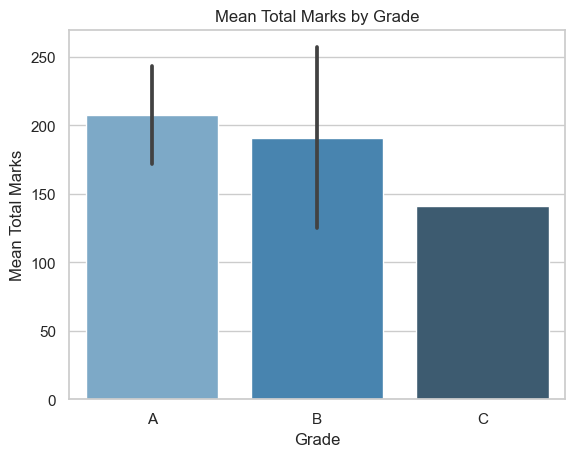

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame (replace this with your actual data)
data = {
    "DV": [85, 90, "A", 70, 65],
    "PP": [80, 75, 88, "A", 60],
    "BEEE": [78, 92, 84, 71, "A"],
    "Grade": ["A", "B", "A", "C", "B"]
}
df = pd.DataFrame(data)

# Step 1: Convert columns to numeric, replacing non-numeric values with NaN
numeric_columns = ["DV", "PP", "BEEE"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Handle missing values (e.g., replace NaN with 0 or drop rows)
df.fillna(0, inplace=True)  # Replace NaN with 0

# Step 3: Calculate the Total column
df["Total"] = df[numeric_columns].sum(axis=1)

# Step 4: Create the bar plot
sns.barplot(data=df, x="Grade", y="Total", estimator=np.mean, ci="sd", palette="Blues_d")
plt.title("Mean Total Marks by Grade")
plt.xlabel("Grade")
plt.ylabel("Mean Total Marks")
plt.show()


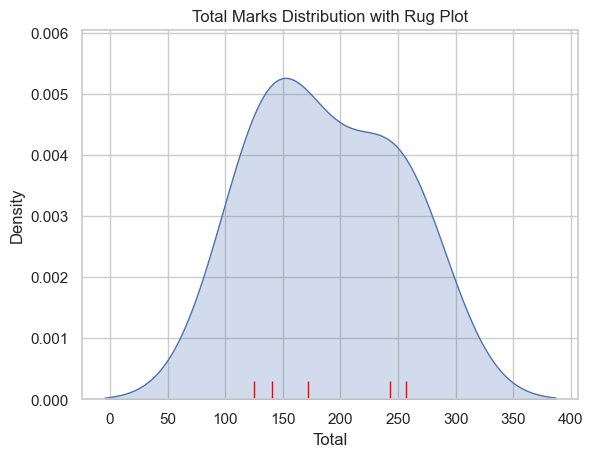

In [72]:
sns.kdeplot(data=df, x="Total", shade=True)
sns.rugplot(data=df, x="Total", height=0.05, color="red")
plt.title("Total Marks Distribution with Rug Plot")
plt.show()


Variance of 'Total' marks by Grade:
Grade
A    2520.5
B    8712.0
C       NaN
Name: Total, dtype: float64


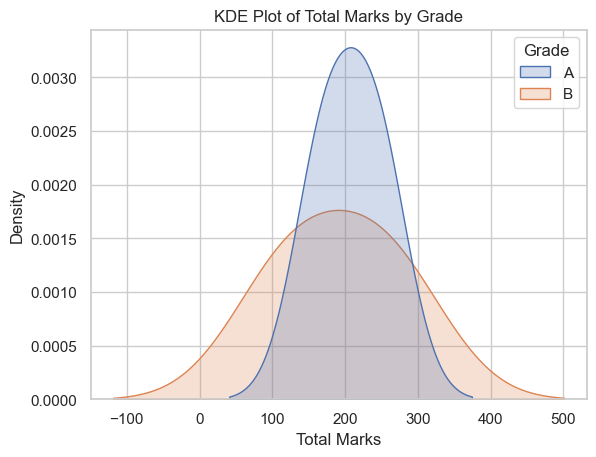

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check variance of 'Total' marks by Grade
variance_check = df.groupby("Grade")["Total"].var()
print("Variance of 'Total' marks by Grade:")
print(variance_check)

# Filter out groups with zero variance
grades_with_variance = variance_check[variance_check > 0].index
filtered_df = df[df["Grade"].isin(grades_with_variance)]

# Plot KDE only for groups with non-zero variance
sns.kdeplot(data=filtered_df, x="Total", hue="Grade", shade=True, warn_singular=False)
plt.title("KDE Plot of Total Marks by Grade")
plt.xlabel("Total Marks")
plt.ylabel("Density")
plt.show()


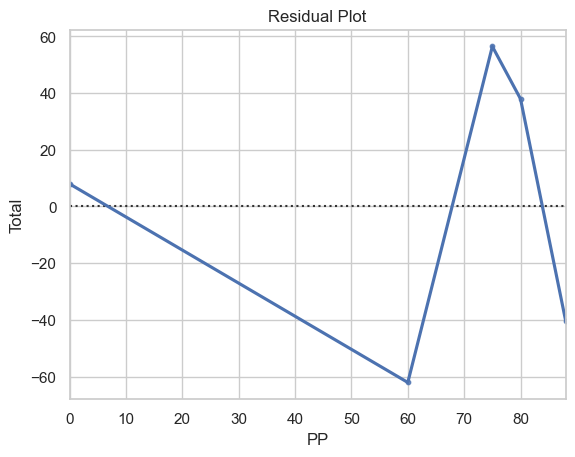

In [76]:
sns.residplot(data=df, x="PP", y="Total", lowess=True, scatter_kws={"s": 10})
plt.title("Residual Plot")
plt.show()


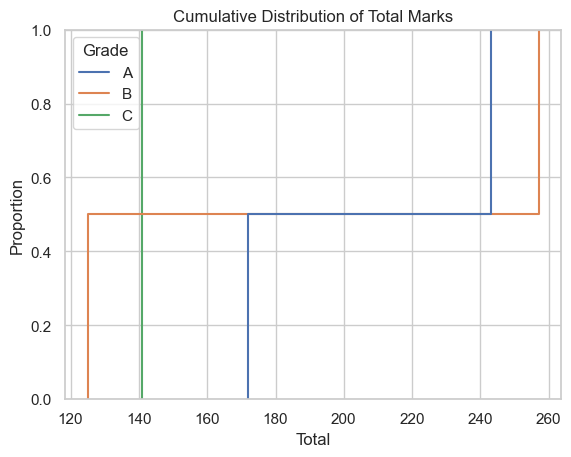

In [77]:
sns.ecdfplot(data=df, x="Total", hue="Grade", stat="proportion")
plt.title("Cumulative Distribution of Total Marks")
plt.show()


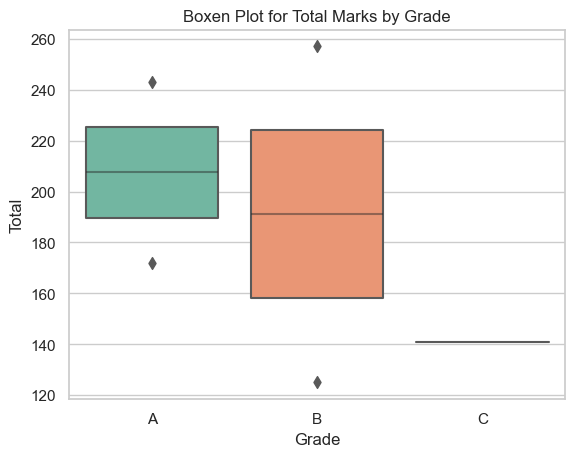

In [78]:
sns.boxenplot(data=df, x="Grade", y="Total", palette="Set2")
plt.title("Boxen Plot for Total Marks by Grade")
plt.show()


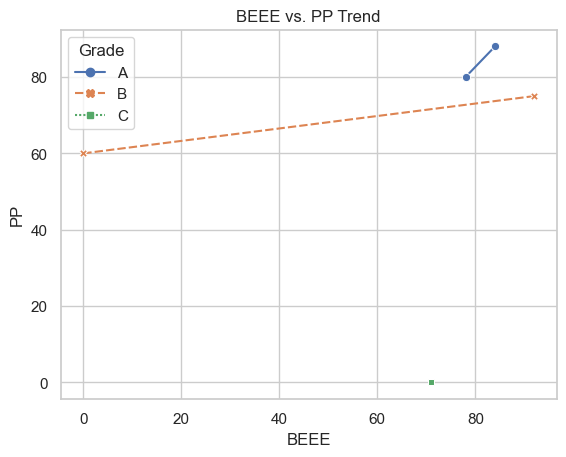

In [80]:
sns.lineplot(data=df, x="BEEE", y="PP", hue="Grade", style="Grade", markers=True)
plt.title("BEEE vs. PP Trend")
plt.show()


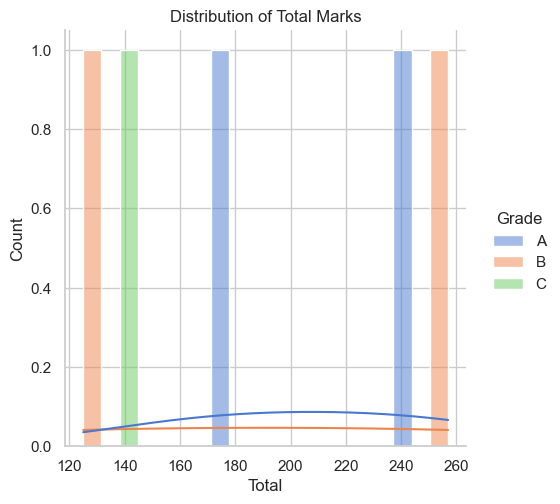

In [81]:
sns.displot(data=df, x="Total", kde=True, bins=20, hue="Grade", palette="muted")
plt.title("Distribution of Total Marks")
plt.show()


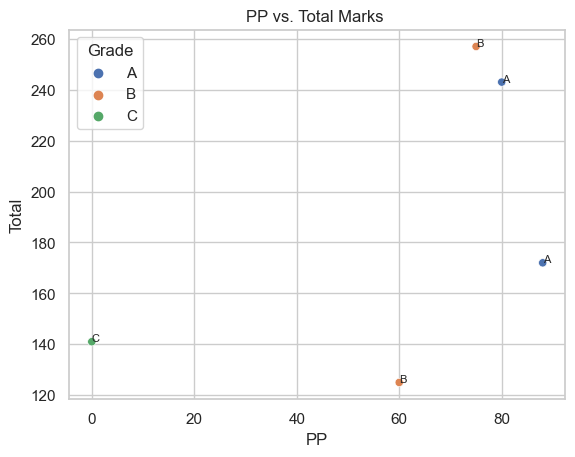

In [84]:
sns.scatterplot(data=df, x="PP", y="Total", hue="Grade")
for i, row in df.iterrows():
    plt.text(row["PP"], row["Total"], row["Grade"], fontsize=8)
plt.title("PP vs. Total Marks ")
plt.show()
